In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [2]:
df_wine = pd.read_csv("winequalityN.csv")

shape of data

In [3]:
df_wine.shape

(6497, 13)

information of columns

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


checking for missing values

In [6]:
df_wine.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

since there are missing values we can drop them


In [7]:
df_wine.dropna().shape

(6463, 13)

In [8]:
df = df_wine.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Exploratory Data Analysis

Analysis of quality of wine

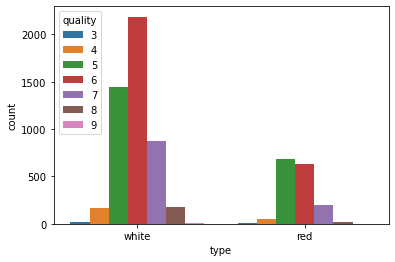

In [9]:
sns.countplot(x=df['type'],hue=df['quality'])
plt.show()

In [10]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [11]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [12]:
corr = df.corr()

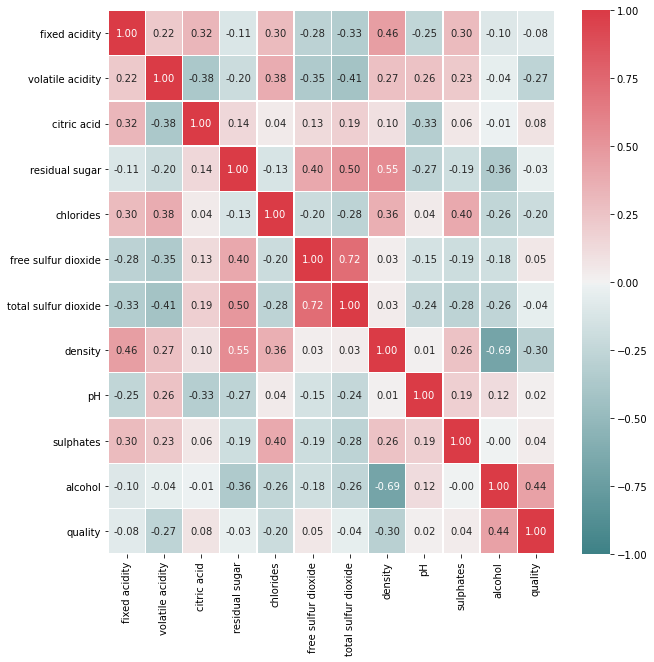

In [13]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")
plt.show()

there is a postive correlation between the quality of wine and alcohol at 0.44 and a real negative correlation between the alcohol content and density at -0.69

In [14]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


total sulphur dioxide has higher correlation we can retain or discard the column

In [15]:
df_wine = df.drop('total sulfur dioxide', axis = 1)

In [16]:
df_wine.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

Since the column type is an object type, we convert it into integer by assigning values 0 and 1 to wine types

In [17]:
df_wine = pd.get_dummies(df_wine, drop_first = True)

In [18]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


Min-Max Normalization We plan to normalize by scaling out data because the features range high, so this technique could help to balance the ranges of data between 0 and 1

In [19]:
# importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(df_wine)
df_scaled = norm_fit.transform(df_wine)
# new_xtest = norm_fit.transform(x_test)
# display values
print(df_scaled)

[[0.26446281 0.12666667 0.21686747 ... 0.11594203 0.5        1.        ]
 [0.20661157 0.14666667 0.20481928 ... 0.2173913  0.5        1.        ]
 [0.3553719  0.13333333 0.24096386 ... 0.30434783 0.5        1.        ]
 ...
 [0.20661157 0.28666667 0.07831325 ... 0.43478261 0.5        0.        ]
 [0.17355372 0.37666667 0.07228916 ... 0.31884058 0.33333333 0.        ]
 [0.18181818 0.15333333 0.28313253 ... 0.43478261 0.5        0.        ]]


In [20]:
df_new = pd.DataFrame(df_scaled, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'best quality'])

In [21]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942,0.5,1.0
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391,0.5,1.0
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348,0.5,1.0
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362,0.5,1.0


store label in y

In [22]:
y = df_new["best quality"]

In [24]:
y.value_counts()

1.0    4870
0.0    1593
Name: best quality, dtype: int64

store the feature columns in x

In [25]:
x = df_new.drop(["quality", "best quality"], axis=1)

In [26]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.163678,0.364341,0.101124,0.275362
...,...,...,...,...,...,...,...,...,...,...
6458,0.247934,0.360000,0.048193,0.019939,0.098007,0.093750,0.181222,0.542636,0.337079,0.217391
6459,0.198347,0.346667,0.048193,0.021472,0.134551,0.107639,0.150183,0.565891,0.202247,0.362319
6460,0.206612,0.286667,0.078313,0.026074,0.111296,0.097222,0.166377,0.542636,0.297753,0.434783
6461,0.173554,0.376667,0.072289,0.021472,0.109635,0.107639,0.161172,0.658915,0.275281,0.318841


Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_score, recall_score

In [28]:
log = pd.DataFrame(columns=["model", "accuracy", "Precision", "Recall", "F1 Score", "ROC"])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Logistic Regression

In [30]:
lr = LogisticRegression(solver='liblinear')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[302,  20],
       [ 15, 956]], dtype=int64)

In [282]:
log = log.append({"model" : "logistic regression", "accuracy" : score, "Precision" : prec, "Recall" : rec, "F1 Score" : f1, "ROC" : roc}, ignore_index=True)

In [283]:
log

,model,accuracy,Precision,Recall,F1 Score,ROC
0,logistic regression,0.972931,0.979508,0.984552,0.982024,0.96122


Support Vector Machine

In [284]:
from sklearn import svm

In [285]:
svm_ = svm.SVC(kernel='rbf')

svm_.fit(X_train, y_train)

y_pred = svm_.predict(X_test)

score = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [286]:
confusion_matrix(y_test, y_pred)

array([[314,   8],
       [  5, 966]], dtype=int64)

In [287]:
log = log.append({"model" : " Support Vector Machine", "accuracy" : score, "Precision" : prec, "Recall" : rec, "F1 Score" : f1, "ROC" : roc}, ignore_index=True)

In [288]:
log

,model,accuracy,Precision,Recall,F1 Score,ROC
0,logistic regression,0.972931,0.979508,0.984552,0.982024,0.961220
1,Support Vector Machine,0.989946,0.991786,0.994851,0.993316,0.985003


Decision Tree Classifier

In [289]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=7)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
log = log.append({"model" : "Decision Tree", "accuracy" : score, "Precision" : prec, "Recall" : rec, "F1 Score" : f1, "ROC" : roc}, ignore_index=True)

In [290]:
log

,model,accuracy,Precision,Recall,F1 Score,ROC
0,logistic regression,0.972931,0.979508,0.984552,0.982024,0.961220
1,Support Vector Machine,0.989946,0.991786,0.994851,0.993316,0.985003
2,Decision Tree,0.973705,0.982492,0.982492,0.982492,0.964849


K Nearest Neighbour

In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [292]:
knn_ = KNeighborsClassifier(n_neighbors=3)
knn_.fit(X_train, y_train)
knn_.predict(X_test)
y_pred = knn_.predict(X_test)
score = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
log = log.append({"model" : "KNN", "accuracy" : score, "Precision" : prec, "Recall" : rec, "F1 Score" : f1, "ROC" : roc}, ignore_index=True)

In [293]:
log

,model,accuracy,Precision,Recall,F1 Score,ROC
0,logistic regression,0.972931,0.979508,0.984552,0.982024,0.961220
1,Support Vector Machine,0.989946,0.991786,0.994851,0.993316,0.985003
2,Decision Tree,0.973705,0.982492,0.982492,0.982492,0.964849
3,KNN,0.979892,0.987616,0.985582,0.986598,0.974157
